In [1]:
import scanpy as sc
# Read 10x dataset
adata = sc.read_10x_h5("neuron_10k_v3_filtered_feature_bc_matrix.h5")
# Make variable names (in this case the genes) unique
adata.var_names_make_unique()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [2]:
sc.tl.pca(adata) #pca of adata before filtering

... storing 'feature_types' as categorical
... storing 'genome' as categorical


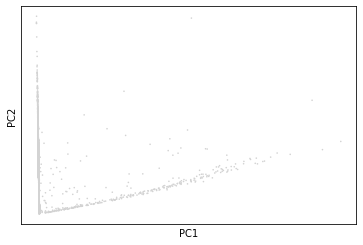

In [3]:
sc.pl.pca(adata) #plot before filtering 

In [4]:
sc.pp.recipe_zheng17(adata) # filter

In [5]:
sc.tl.pca(adata) #pca of adata after filtering

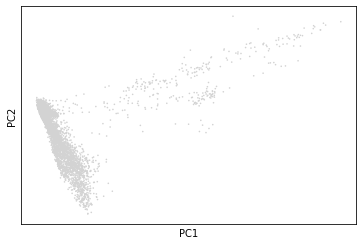

In [6]:
sc.pl.pca(adata) #plot filtered

In [7]:
sc.pp.neighbors(adata) #neighbors needs to be done before leiden 

In [8]:
sc.tl.leiden(adata) # cluster 

In [9]:
sc.tl.tsne(adata) #tsne clusters

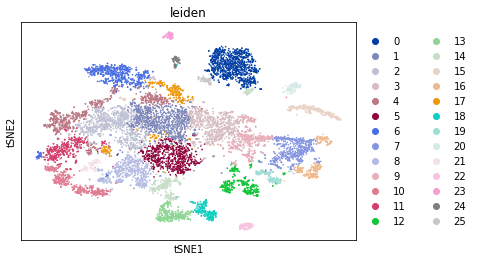

In [10]:
sc.pl.tsne(adata, color = "leiden") #tsne plot colored based on leiden clusters

In [11]:
sc.tl.umap(adata) #umap cluster 

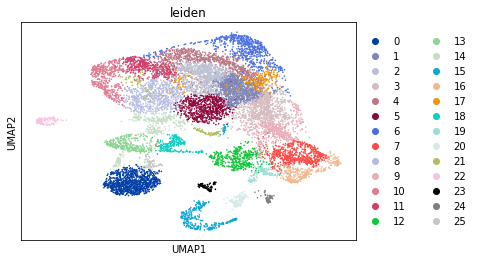

In [46]:
sc.pl.umap(adata, color = "leiden") # umap plot colored based on leiden clusters

In [13]:
sc.tl.rank_genes_groups(adata,groupby = 'leiden')

/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/scanpy/tools/_rank_genes_groups.py:408: RuntimeWarning: invalid value encountered in log2
  foldchanges[global_indices]


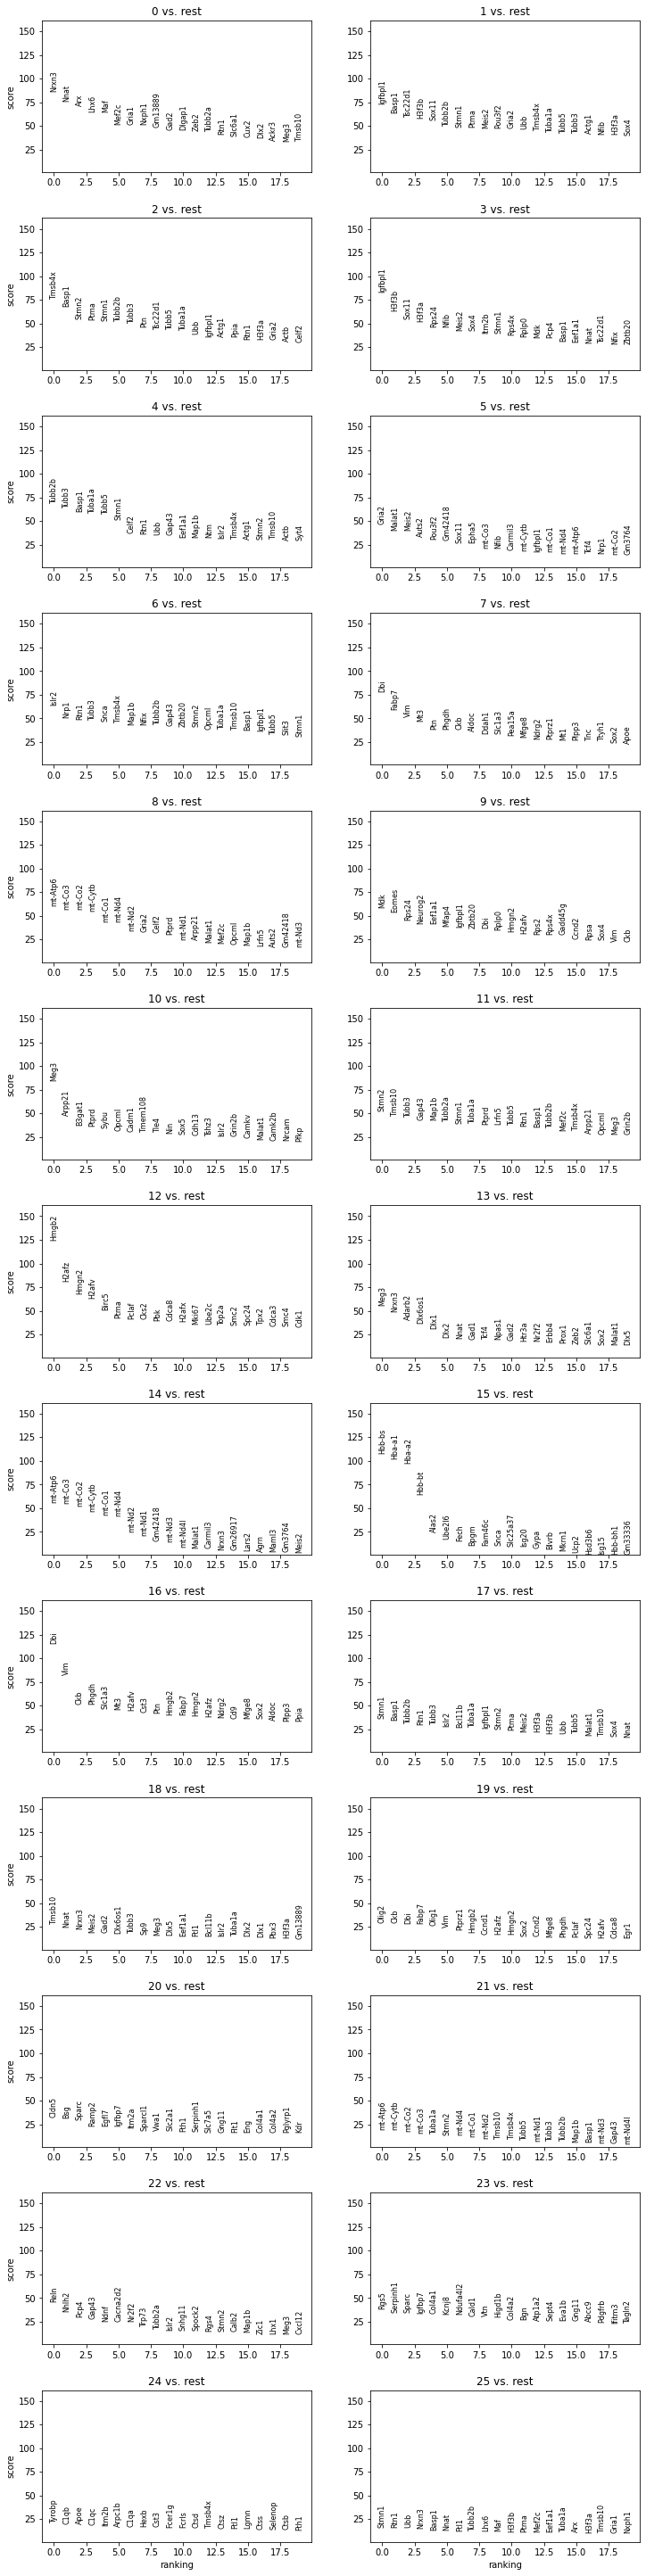

In [14]:
sc.pl.rank_genes_groups(adata, ncols = 2)

/Users/cmdb/miniconda3/envs/scanpy-v2/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


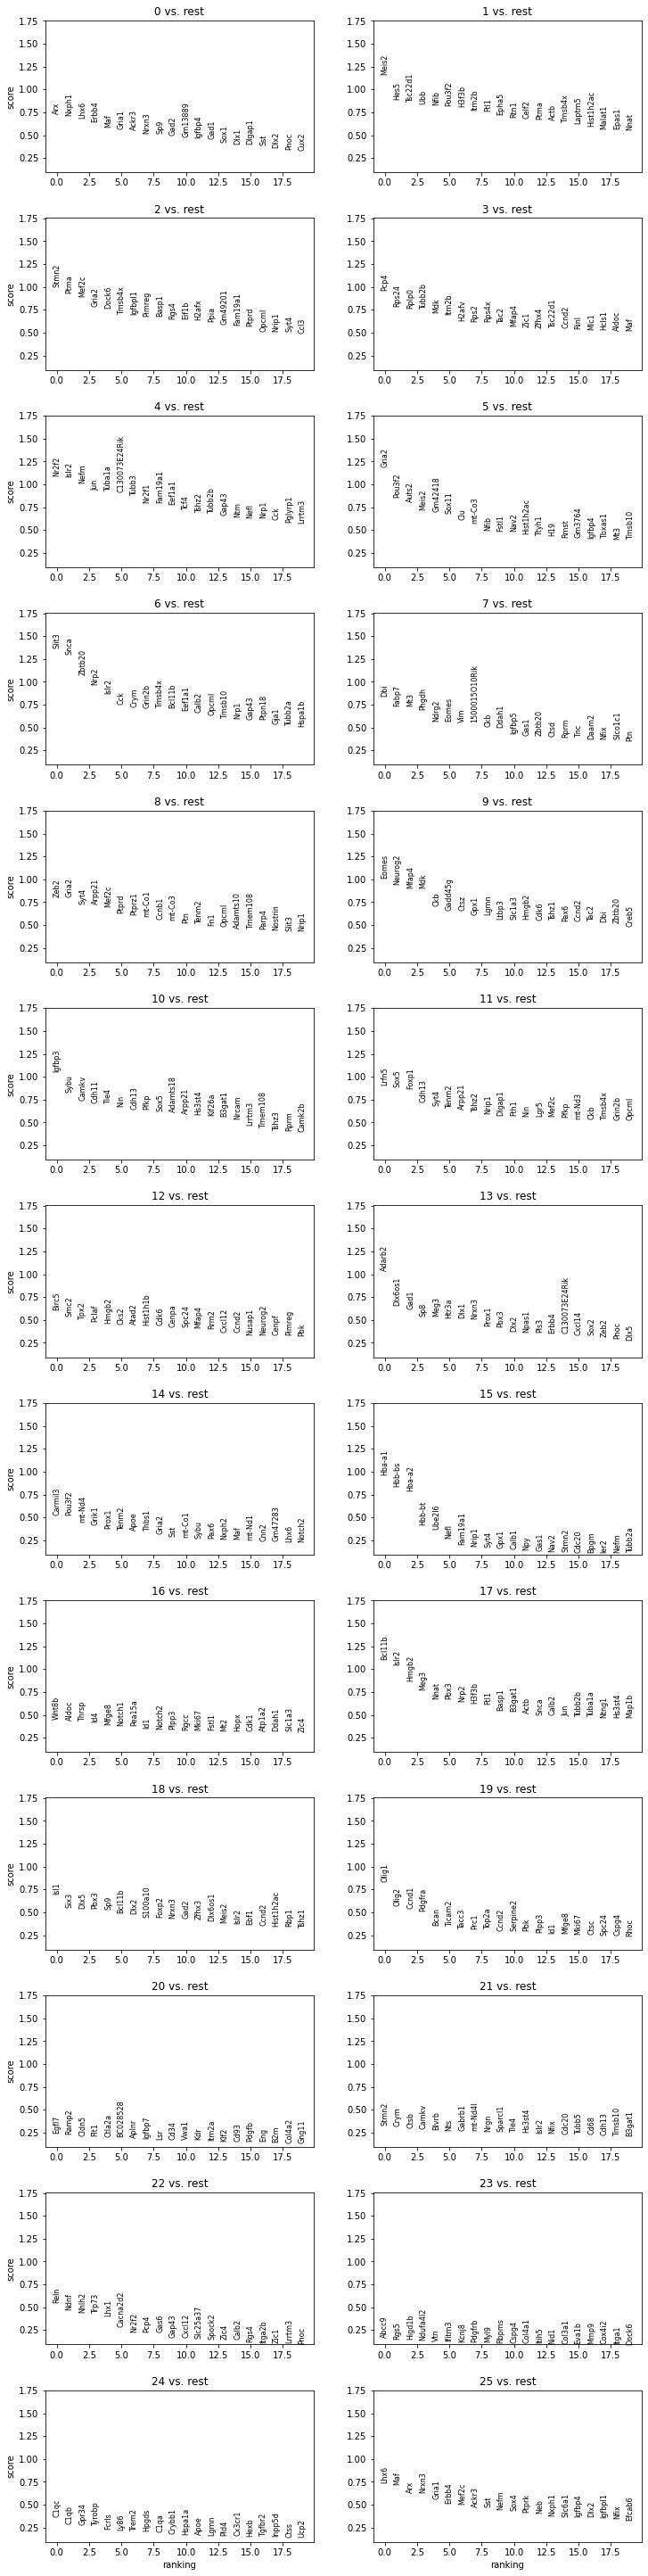

In [15]:
sc.tl.rank_genes_groups(adata,groupby = 'leiden', method = 'logreg')
sc.pl.rank_genes_groups(adata, ncols = 2)

In [37]:
count = 0
for cluster in adata.uns['rank_genes_groups']['names']:
    print(cluster[0])
    count+=1
    if count == 10:
        break

Arx
Nxph1
Lhx6
Erbb4
Maf
Gria1
Ackr3
Nrxn3
Sp9
Gad2


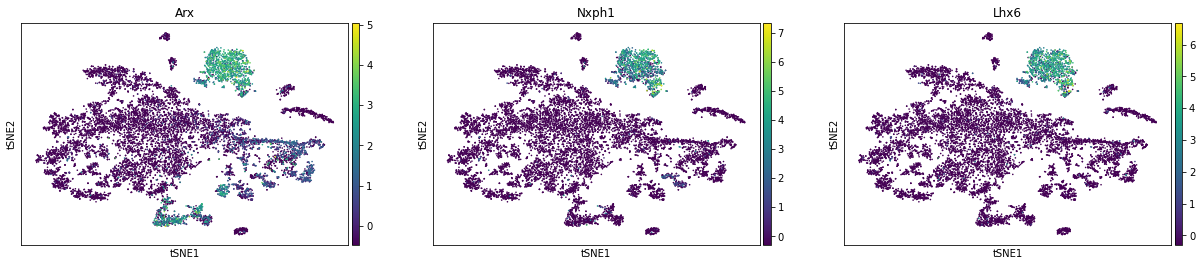

In [41]:
sc.pl.tsne(adata, color = ["Arx",
"Nxph1",
"Lhx6"]) #cluster 0 

In [38]:
count = 0
for cluster in adata.uns['rank_genes_groups']['names']:
    print(cluster[1])
    count+=1
    if count == 10:
        break

Meis2
Hes5
Tsc22d1
Ubb
Nfib
Pou3f2
H3f3b
Itm2b
Ftl1
Epha5


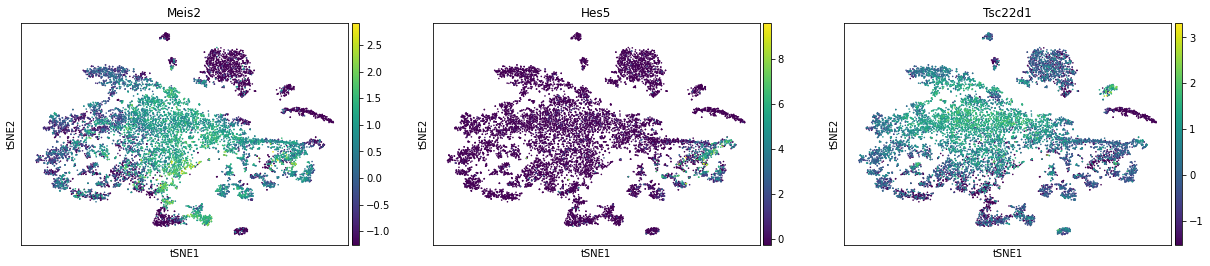

In [42]:
sc.pl.tsne(adata, color = ["Meis2",
"Hes5",
"Tsc22d1"]) #cluster 1

In [39]:
count = 0
for cluster in adata.uns['rank_genes_groups']['names']:
    print(cluster[12])
    count+=1
    if count == 10:
        break

Birc5
Smc2
Tpx2
Pclaf
Hmgb2
Cks2
Atad2
Hist1h1b
Cdk6
Cenpa


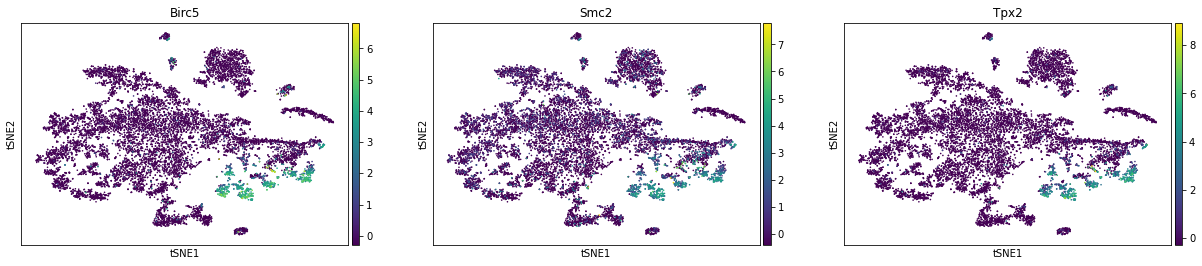

In [43]:
sc.pl.tsne(adata, color = ["Birc5",
"Smc2",
"Tpx2"]) #cluster 12

In [40]:
count = 0
for cluster in adata.uns['rank_genes_groups']['names']:
    print(cluster[23])
    count+=1
    if count == 10:
        break

Abcc9
Rgs5
Higd1b
Ndufa4l2
Vtn
Ifitm3
Kcnj8
Pdgfrb
Myl9
Rbpms


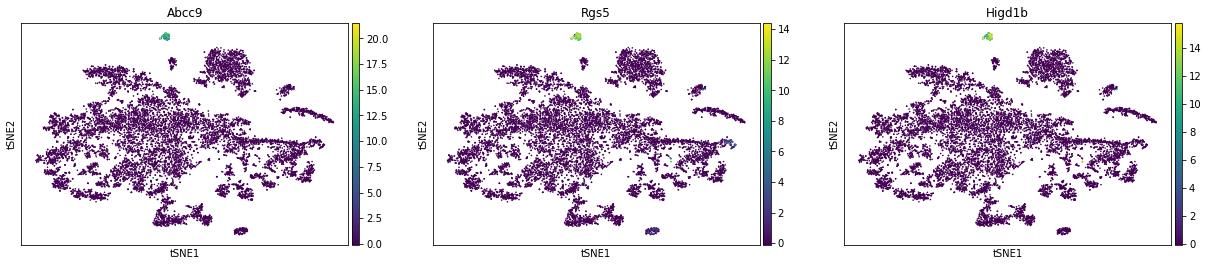

In [44]:
sc.pl.tsne(adata, color = ["Abcc9",
"Rgs5",
"Higd1b"]) #cluster 23

21 = pericyte
0 = cholinergic
22 = microglia
1 = gabaergic
6 = astrocytes
15 = astrocytes 2
12 = neural crest-like glia
17 = oligodendrocytes, Olig1, Olig2
23 = vascular smooth cells
11 = pyramidal neurons, Camkv
18 = vascular endothelial cells (BBB?)'

In [47]:
for i in range(len(adata.obs['leiden'])):
    if adata.obs['leiden'][i] == '21':
        adata.obs['leiden'].replace(adata.obs['leiden'][i],'pericyte', inplace = True)
    elif adata.obs['leiden'][i] == '0':
        adata.obs['leiden'].replace(adata.obs['leiden'][i],'cholinergic', inplace = True)
    elif adata.obs['leiden'][i] == '22':
        adata.obs['leiden'].replace(adata.obs['leiden'][i],'microglia', inplace = True)
    elif adata.obs['leiden'][i] == '1':
        adata.obs['leiden'].replace(adata.obs['leiden'][i],'gabaergic', inplace = True)
    elif adata.obs['leiden'][i] == '6':
        adata.obs['leiden'].replace(adata.obs['leiden'][i],'astrocytes', inplace = True)
    elif adata.obs['leiden'][i] == '15':
        adata.obs['leiden'].replace(adata.obs['leiden'][i],'astrocytes2', inplace = True)
    elif adata.obs['leiden'][i] == '12':
        adata.obs['leiden'].replace(adata.obs['leiden'][i],'nueral crest-like glia', inplace = True)
    elif adata.obs['leiden'][i] == '17':
        adata.obs['leiden'].replace(adata.obs['leiden'][i],'oligodendrocytes, Olig1, Olig2', inplace = True)
    elif adata.obs['leiden'][i] == '23':
        adata.obs['leiden'].replace(adata.obs['leiden'][i],'vascular smooth cells', inplace = True)
    elif adata.obs['leiden'][i] == '11':
        adata.obs['leiden'].replace(adata.obs['leiden'][i],'pyramidal neurons, Camkv', inplace = True)
    elif adata.obs['leiden'][i] == '18':
        adata.obs['leiden'].replace(adata.obs['leiden'][i],'vascular endothelial cells', inplace = True)

        #Repeat for each cell type to be replaced

In [45]:
adata.uns['leiden_colors'][21] = '#B5BD61'
adata.uns['leiden_colors'][23] = '#000000'
adata.uns['leiden_colors'][7] = '#FF4A46'
adata.uns['leiden_colors'][15] = "#0AA6D8"

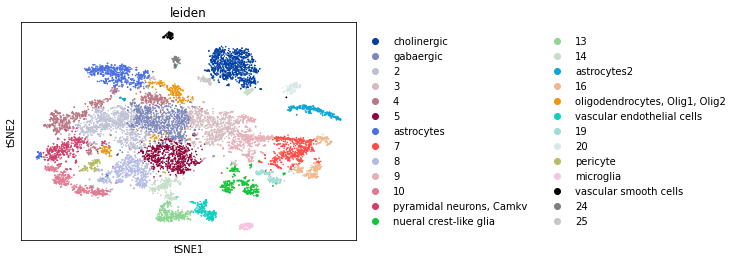

In [48]:
sc.pl.tsne(adata, color = "leiden") #tsne plot colored based on leiden clusters

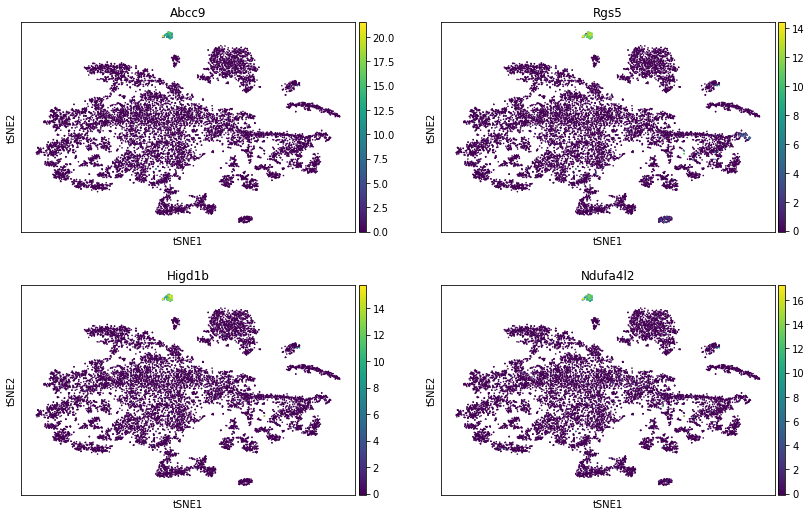

In [49]:
#pericytes and vascular related cells = 21 vs. rest
sc.pl.tsne(adata, color=['Abcc9', 'Rgs5', 'Higd1b','Ndufa4l2'], ncols=2)